# CO2 Emmision Analysis

In [112]:
#Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv("E:\\visualizing_global_co2_data.csv")

In [114]:
#Gathering Information about DataSet

print("Information regarding null values\n")
print(df.info()) 
#Retrieve First 5 top values
print("\n\n")
print("First 5 values\n")
print(df.head())  
print("\n\n")
#Retrieve Last 5 bottom values
print("First 5 values\n")                                     
print(df.tail()) 

Information regarding null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 76 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    3664 non-null   object 
 1   Year                                       3664 non-null   int64  
 2   ISO_Code                                   3457 non-null   object 
 3   Population                                 3664 non-null   int64  
 4   GDP                                        3286 non-null   float64
 5   Cement_CO2                                 3662 non-null   float64
 6   Cement_CO2_Per_Capita                      3662 non-null   float64
 7   CO2                                        3664 non-null   float64
 8   CO2_Growth_Abs                             3661 non-null   float64
 9   CO2_Growth_Prct                            3660 non-null   fl

In [115]:
print('\n\n')
print('summary of dataset')
print(df.describe())




summary of dataset
              Year    Population           GDP   Cement_CO2  \
count  3664.000000  3.664000e+03  3.286000e+03  3662.000000   
mean   2000.407751  1.177338e+08  6.838735e+11    19.098222   
std      13.823473  4.248340e+08  1.848790e+12    93.110878   
min    1846.000000  1.262930e+05  6.899427e+08     0.000000   
25%    1993.000000  5.244384e+06  2.798578e+10     0.365250   
50%    2002.000000  1.506917e+07  1.275085e+11     1.360000   
75%    2011.000000  4.821060e+07  4.471572e+11     5.483000   
max    2021.000000  4.663087e+09  1.815160e+13  1330.143000   

       Cement_CO2_Per_Capita           CO2  CO2_Growth_Abs  CO2_Growth_Prct  \
count            3662.000000   3664.000000     3661.000000      3660.000000   
mean                0.146251    585.521156        8.158968         4.550966   
std                 0.159316   2053.718615       77.020886        65.777754   
min                 0.000000      0.011000     -863.632000       -62.255000   
25%            

In [116]:
#Looking for Missing values

print(df.isna().sum())

Country                       0
Year                          0
ISO_Code                    207
Population                    0
GDP                         378
                           ... 
total_ghg                    14
total_ghg_excluding_lucf    768
trade_co2                   766
trade_co2_share             759
Unnamed: 75                 877
Length: 76, dtype: int64


## Data Cleaning

In [117]:
columns_to_keep = [
    'Country', 'Year', 'Population', 'GDP', 'Cement_CO2', 'CO2',
    'co2_per_capita', 'co2_per_gdp', 'coal_co2', 'gas_co2', 'oil_co2',
    'primary_energy_consumption', 'temperature_change_from_co2',
    'temperature_change_from_ghg'
]

columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
df = df.drop(columns=columns_to_drop)

df.columns = df.columns.str.strip()

numeric_cols = df.select_dtypes(include = ['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [118]:
required_cols = [
    'Country', 'Year', 'CO2', 'coal_co2', 'oil_co2', 'gas_co2',
    'temperature_change_from_co2', 'primary_energy_consumption',
    'GDP', 'co2_per_gdp', 'temperature_change_from_ghg'
]
df.dropna(subset=required_cols, inplace=True)
df.reset_index(drop=True, inplace=True)

print(df.isna().sum())

Country                        0
Year                           0
Population                     0
GDP                            0
Cement_CO2                     0
CO2                            0
co2_per_capita                 0
co2_per_gdp                    0
coal_co2                       0
gas_co2                        0
oil_co2                        0
primary_energy_consumption     0
temperature_change_from_co2    0
temperature_change_from_ghg    0
dtype: int64


In [119]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3664 non-null   object 
 1   Year                         3664 non-null   int64  
 2   Population                   3664 non-null   int64  
 3   GDP                          3664 non-null   float64
 4   Cement_CO2                   3664 non-null   float64
 5   CO2                          3664 non-null   float64
 6   co2_per_capita               3664 non-null   float64
 7   co2_per_gdp                  3664 non-null   float64
 8   coal_co2                     3664 non-null   float64
 9   gas_co2                      3664 non-null   float64
 10  oil_co2                      3664 non-null   float64
 11  primary_energy_consumption   3664 non-null   float64
 12  temperature_change_from_co2  3664 non-null   float64
 13  temperature_change

## Correlations

In [131]:
# Outliers Detection

columns = ['GDP', 'Cement_CO2', 'primary_energy_consumption',
           'temperature_change_from_ghg', 'CO2','coal_co2','gas_co2','oil_co2']
outlier_iqr_summary = {}
for col in columns:
    series = df[col]
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 +1.5*IQR
    outlier = series[(series<lower) | (series > upper)]
    outlier_iqr_summary[col]={
        'IQR': round(IQR,2),
        'lower':round(lower,2),
        'upper':round(upper,2),
        'Outlier Count': outlier.count(),
        'Outlier %': round(outliers.count()/ len(series)*100,2)
    }

    iqr_outlier_df = pd.DataFrame(outlier_iqr_summary)
    print('Outliers Detected using  IQR:')
    print(iqr_outlier_df)
    print('\n\n')
    
    

Outliers Detected using  IQR:
                        GDP
IQR            6.521573e+11
lower         -9.465199e+11
upper          1.662109e+12
Outlier Count  3.290000e+02
Outlier %      8.980000e+00



Outliers Detected using  IQR:
                        GDP  Cement_CO2
IQR            6.521573e+11        5.13
lower         -9.465199e+11       -7.33
upper          1.662109e+12       13.19
Outlier Count  3.290000e+02      595.00
Outlier %      8.980000e+00        8.98



Outliers Detected using  IQR:
                        GDP  Cement_CO2  primary_energy_consumption
IQR            6.521573e+11        5.13                      113.33
lower         -9.465199e+11       -7.33                     -165.51
upper          1.662109e+12       13.19                      287.82
Outlier Count  3.290000e+02      595.00                       64.00
Outlier %      8.980000e+00        8.98                        8.98



Outliers Detected using  IQR:
                        GDP  Cement_CO2  primary_energy

Correlation
CO2                            1.000000
oil_co2                        0.947926
coal_co2                       0.945448
temperature_change_from_co2    0.929457
temperature_change_from_ghg    0.913200
gas_co2                        0.905453
Cement_CO2                     0.842681
Population                     0.805527
GDP                            0.400410
coal_share                     0.195190
co2_per_capita                 0.119133
co2_per_gdp                    0.074954
Year                           0.066309
primary_energy_consumption     0.025977
Name: CO2, dtype: float64


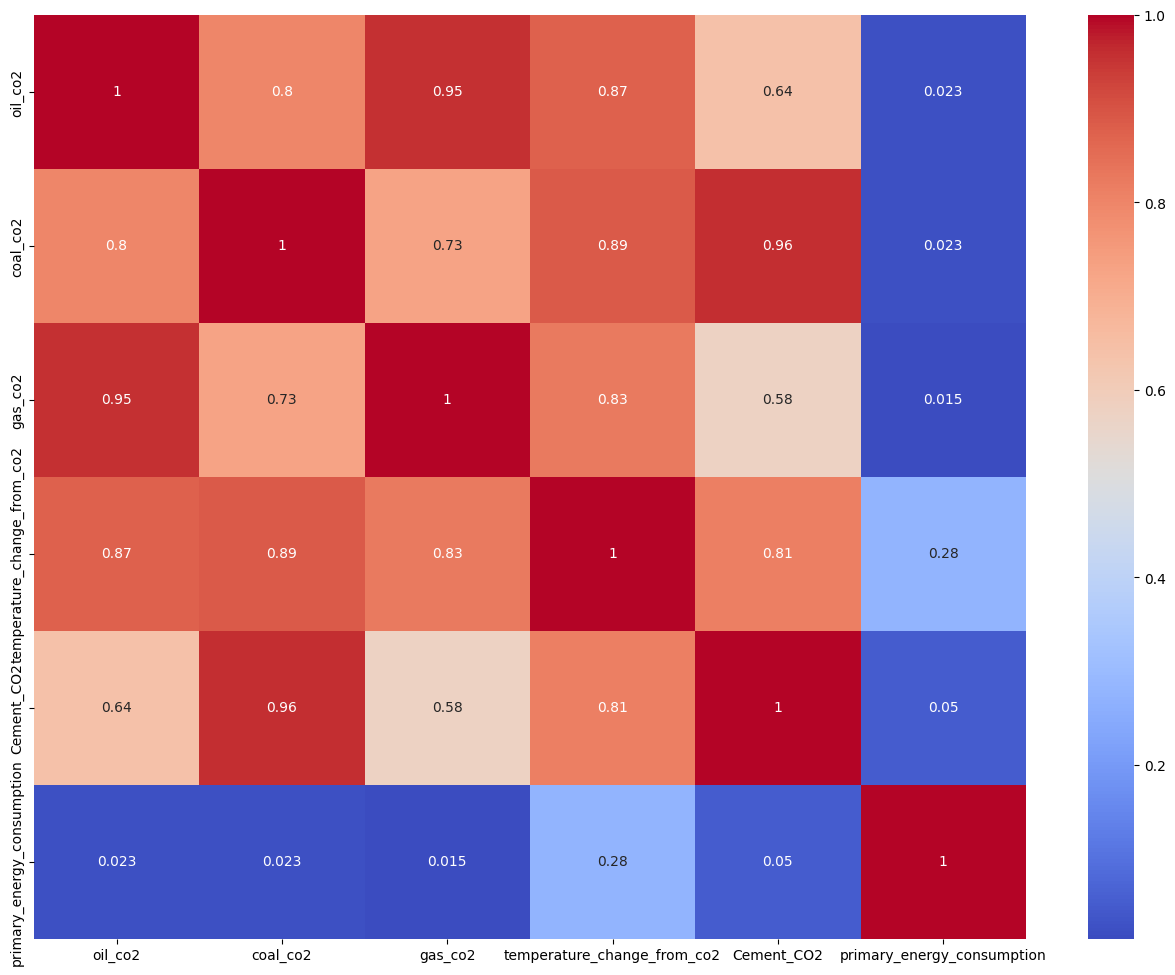

In [132]:
print("Correlation")
correlations = df.corr(numeric_only=True)['CO2'].sort_values(ascending=False)
print(correlations)


# Visualizing correlation matrix
plt.figure(figsize=(16, 12))
corr_data = df[['oil_co2', 'coal_co2', 'gas_co2', 'temperature_change_from_co2', 'Cement_CO2', 'primary_energy_consumption']]
sns.heatmap(corr_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Objectives

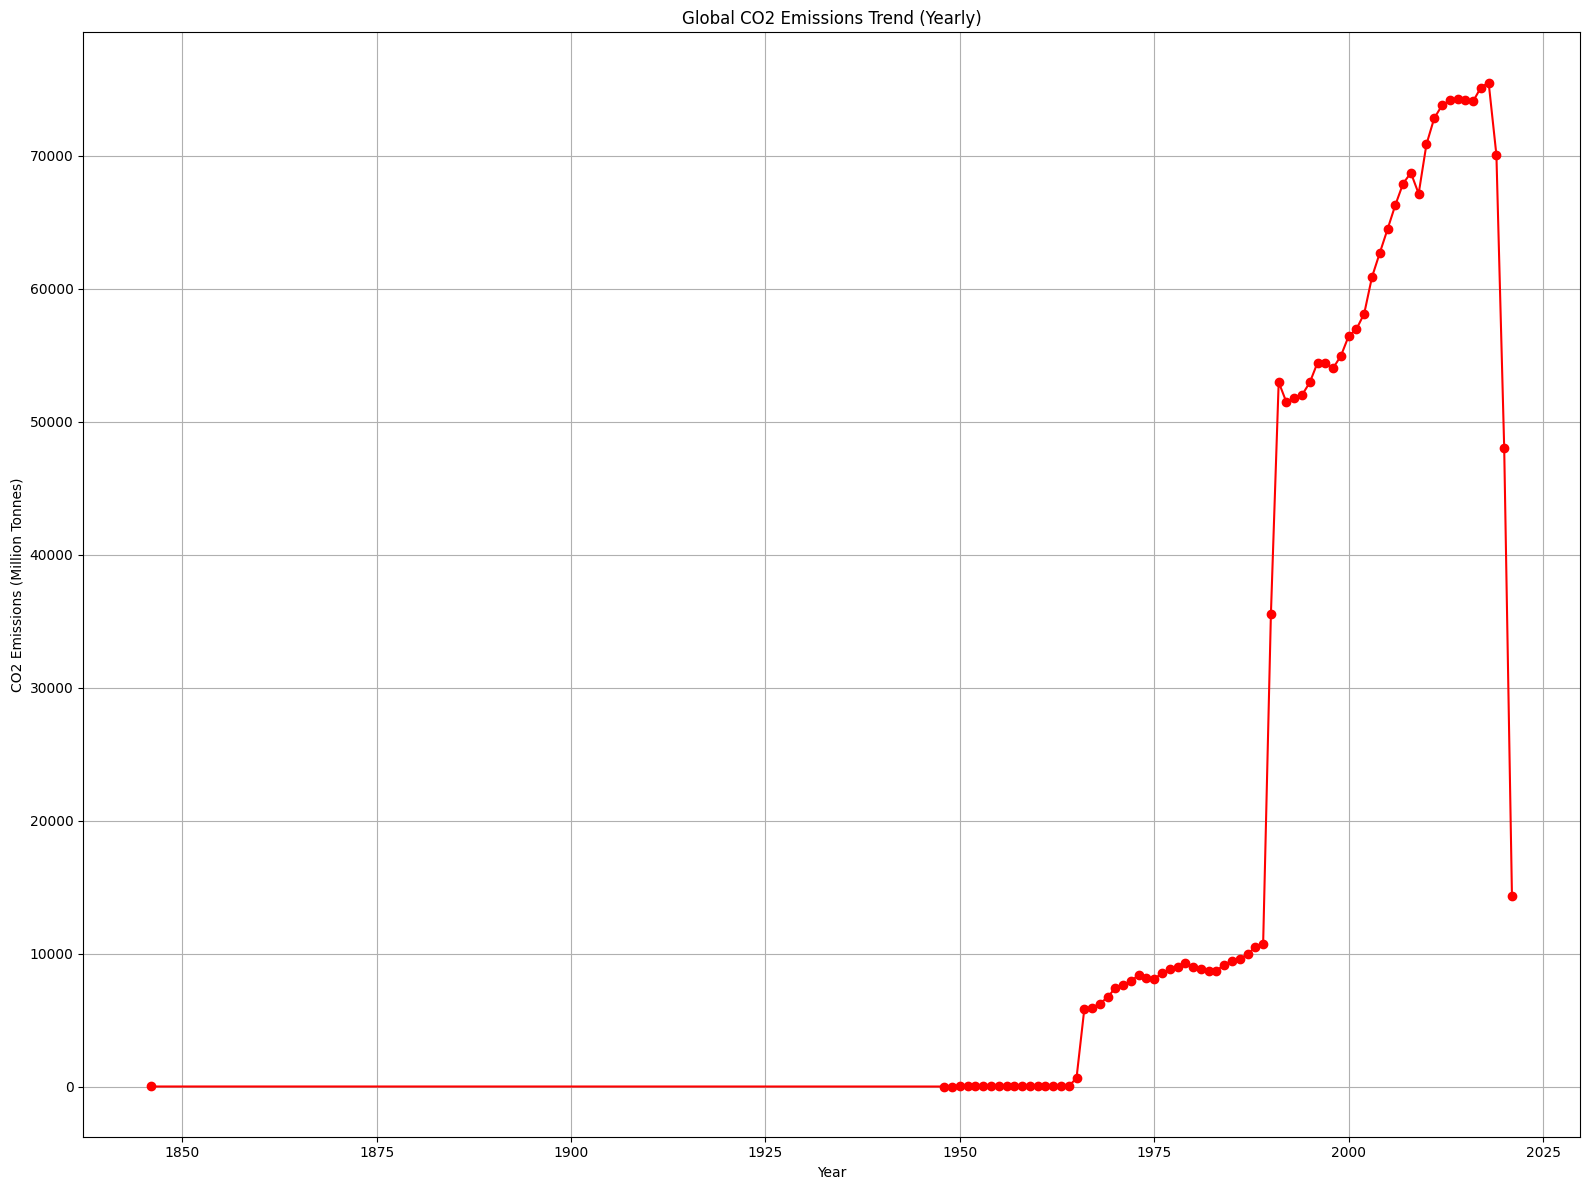

In [134]:
# 1. How have global CO2 emissions changed year-over-year?

plt.figure(figsize=(16,12))
df.groupby('Year')['CO2'].sum().plot(marker='o', color='red')
plt.title('Global CO2 Emissions Trend (Yearly)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Tonnes)')
plt.grid()
plt.tight_layout()
plt.show()

# Conclusion: The time-series plot revealed a steady increase in global CO2 emissions, with noticeable dips during economic recessions 

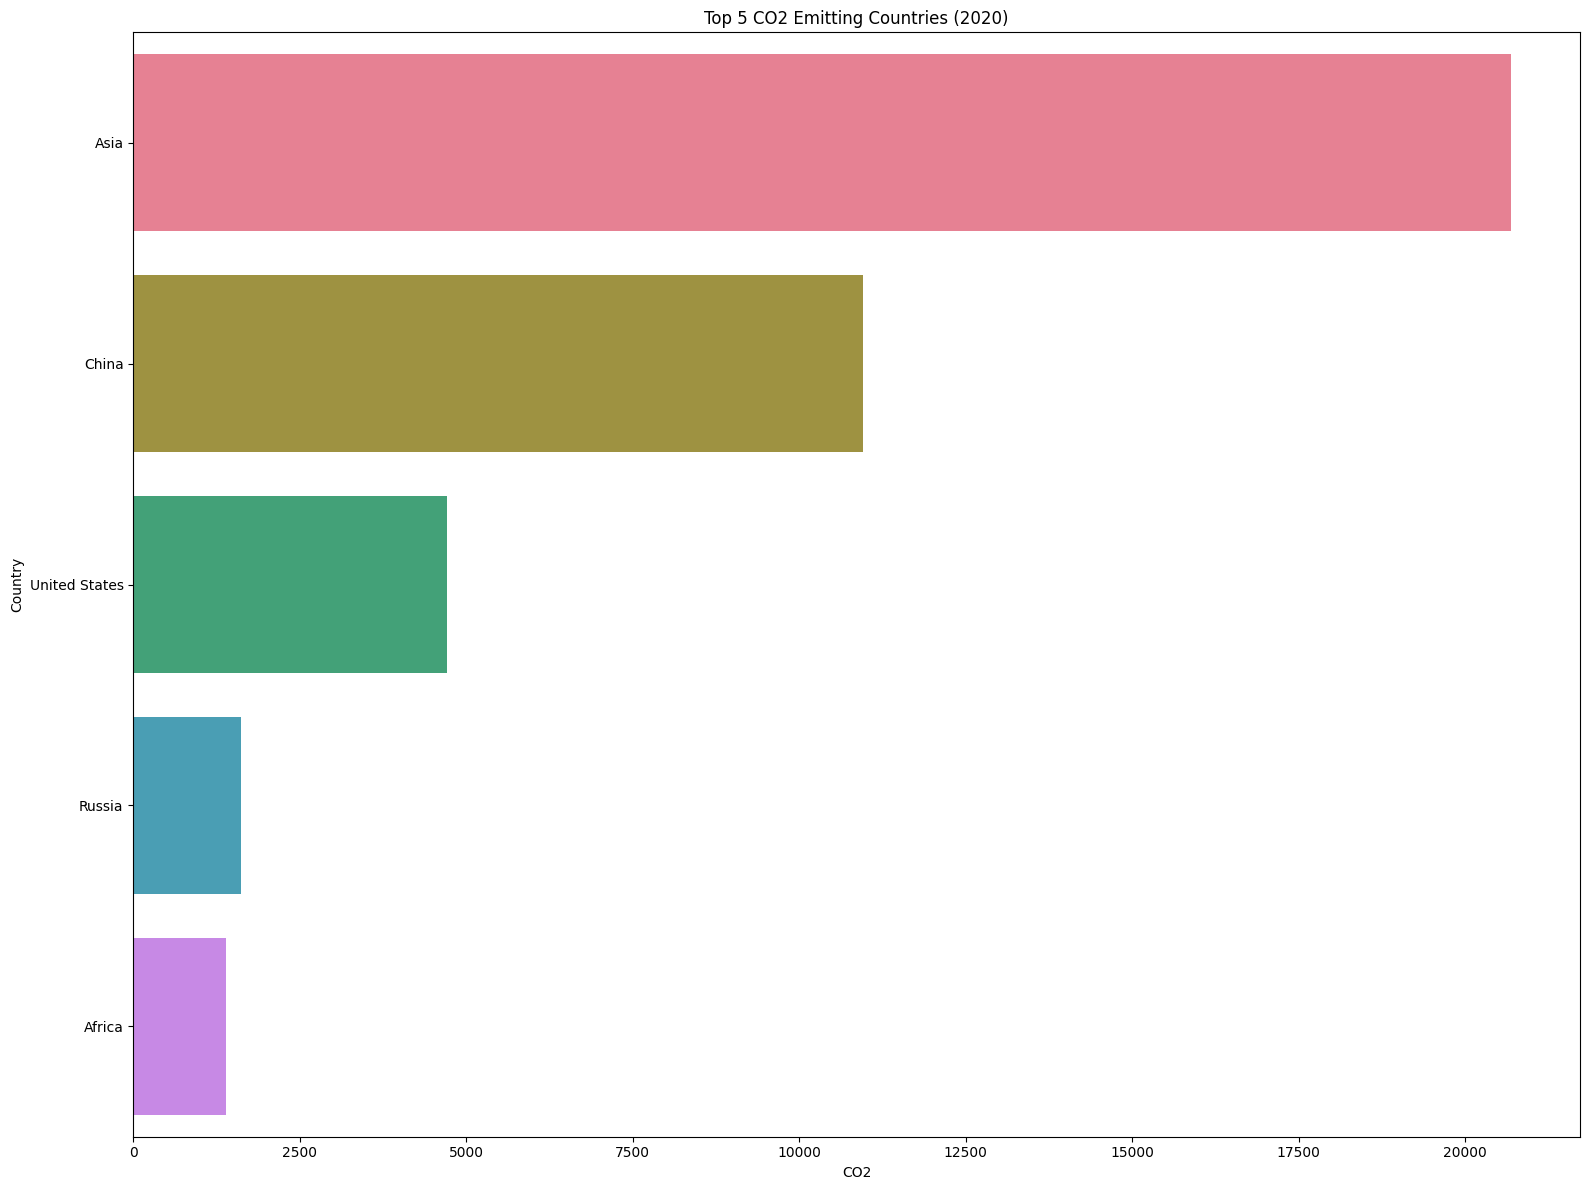

In [123]:
# 2. Which countries contribute the most and least to CO2 emissions in 2020?

top_emitters = df[df['Year'] == 2020].nlargest(5, 'CO2')[['Country', 'CO2']]
plt.figure(figsize=(16, 12))
sns.barplot(x='CO2', y='Country', data=top_emitters, hue='Country',palette=sns.color_palette("husl", len(top_emitters)))
plt.title('Top 5 CO2 Emitting Countries (2020)')
plt.tight_layout()
plt.show()

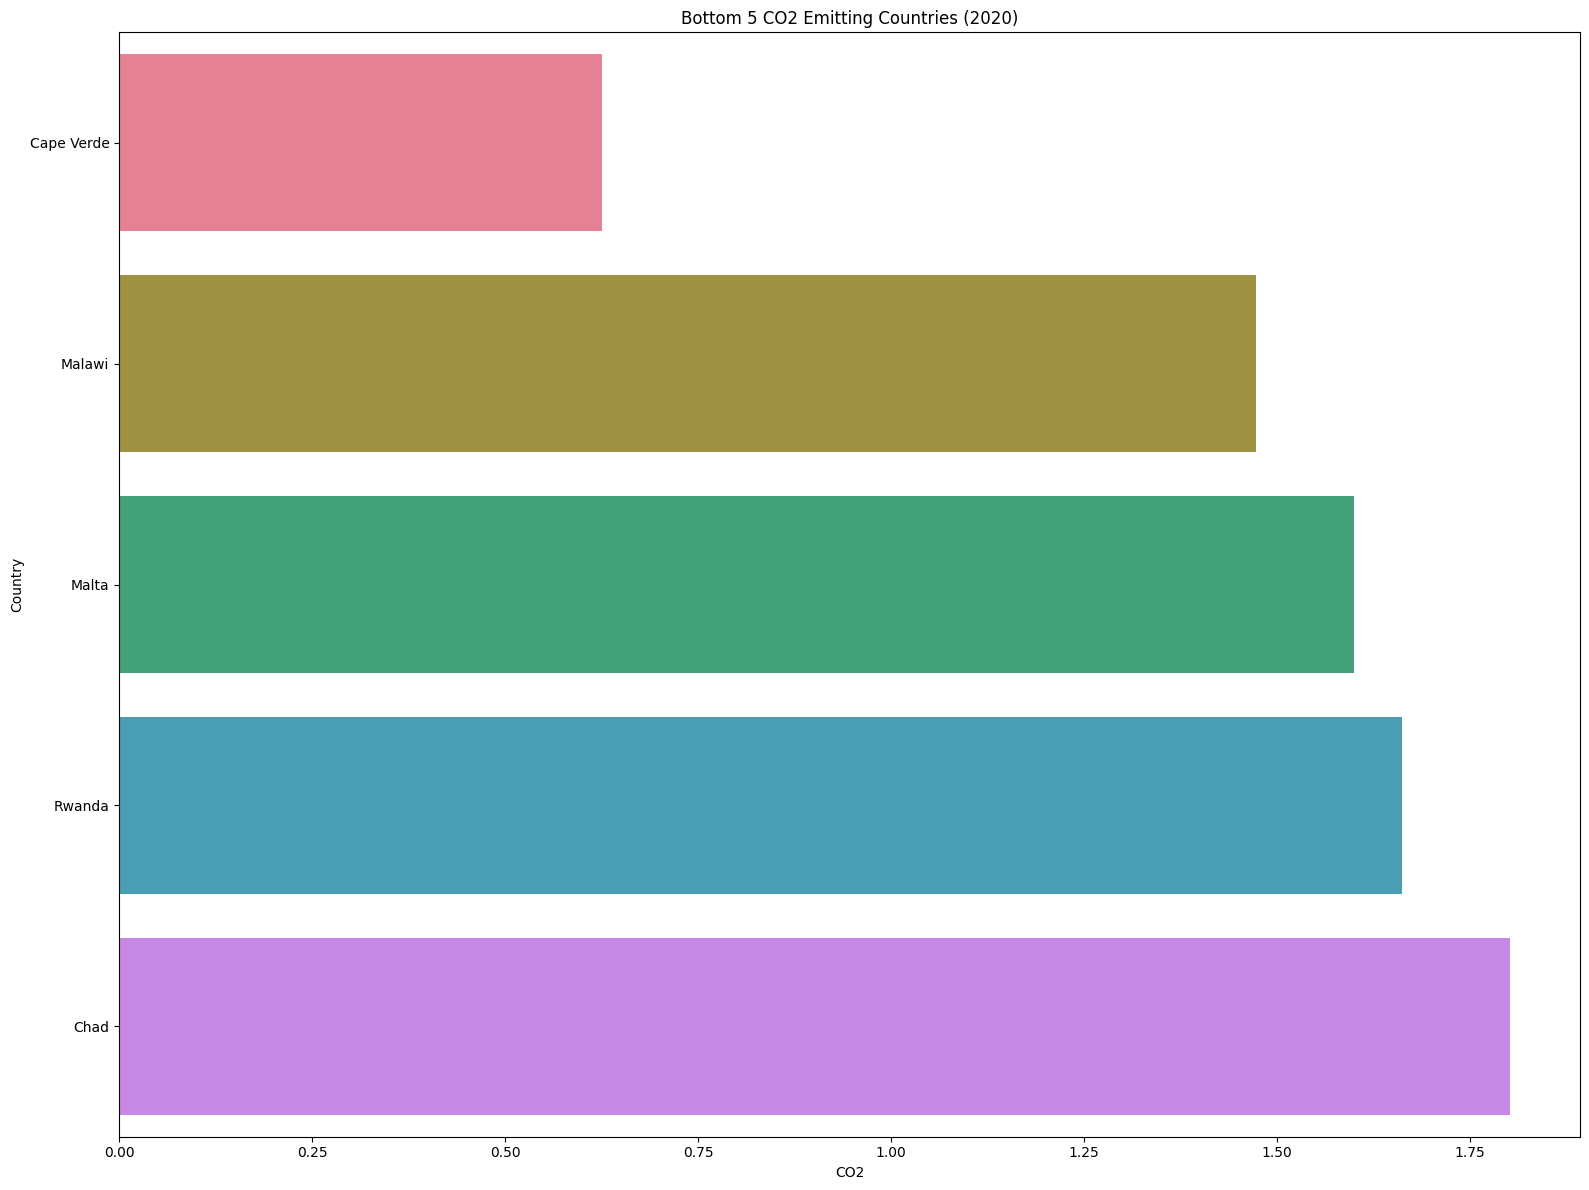

In [135]:
# Least emitters

least_emitters = df[df['Year'] == 2020].nsmallest(5, 'CO2')[['Country', 'CO2']]
plt.figure(figsize=(16, 12))
sns.barplot(x='CO2', y='Country', data=least_emitters, hue='Country',palette=sns.color_palette("husl", len(least_emitters)))
plt.title('Bottom 5 CO2 Emitting Countries (2020)')
plt.tight_layout()
plt.show()

# Conclusion: Asia, China, US dominated emissions. This highlights the disproportionate impact of a few nations and the need for targeted mitigation strategies
# Cape verde, malta, malawi, rwanda, chad have least emmision

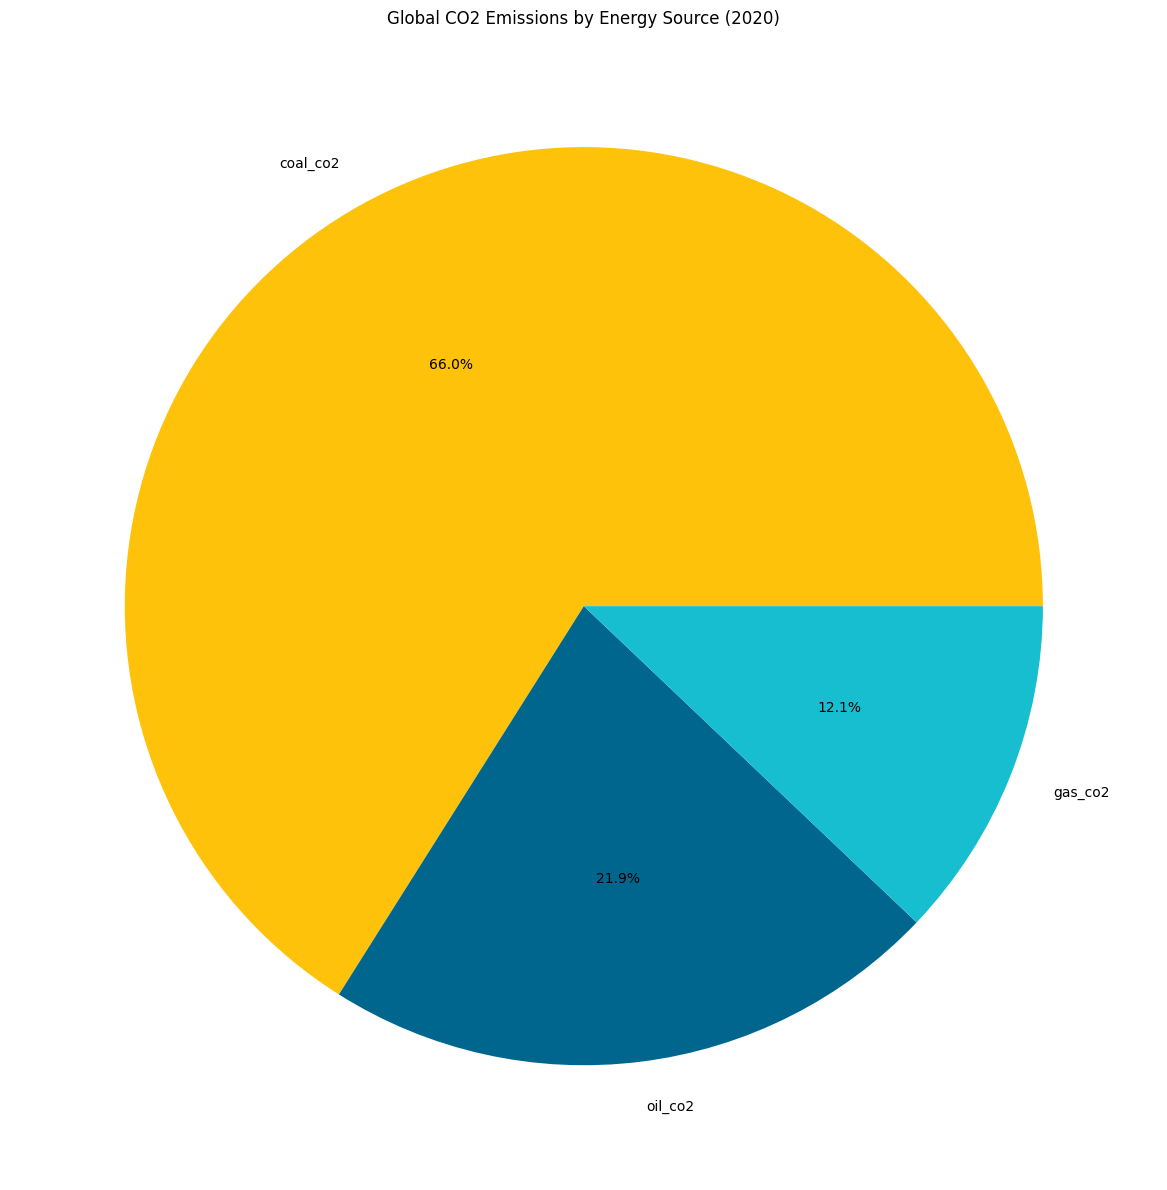

In [136]:
# 3. Energy Source Contribution from coal, oil, and gas

plt.figure(figsize=(16, 12))
sources = ['coal_co2','oil_co2','gas_co2']
source_contribution = df.groupby('Year')[sources].sum().iloc[-1] # Latest year
source_contribution.plot.pie(autopct='%1.1f%%', colors=['#FFC20A','#00668E','#17BECF'])
plt.title('Global CO2 Emissions by Energy Source (2020)')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Conclusion: Coal accounted for highest of emissions, followed by oil and gas. This underscores coal as the most critical target for transitioning to cleaner energy.

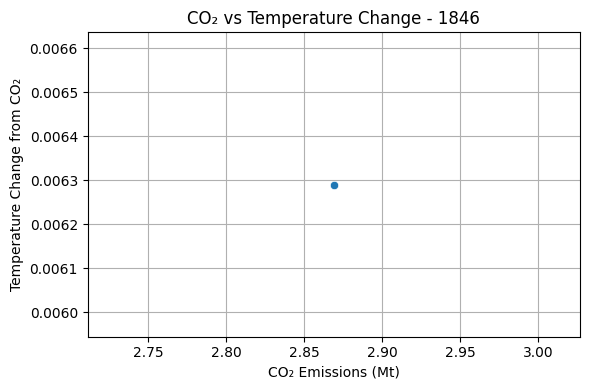

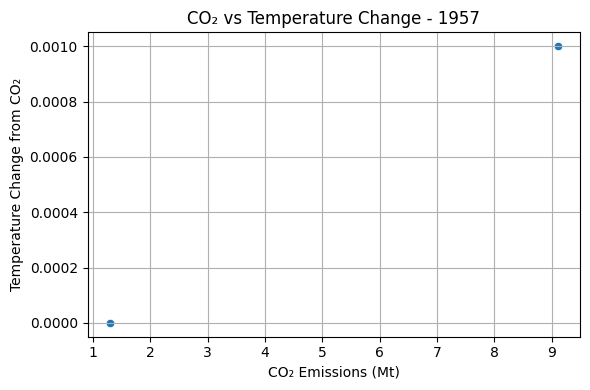

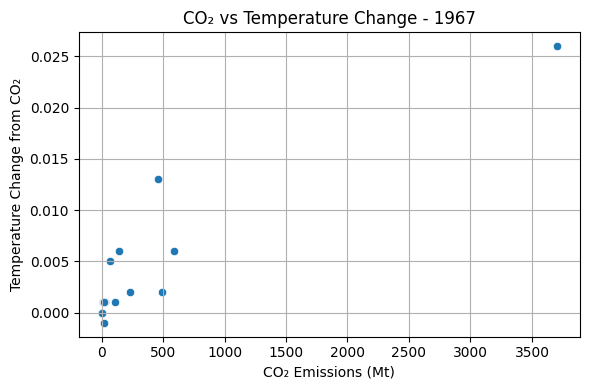

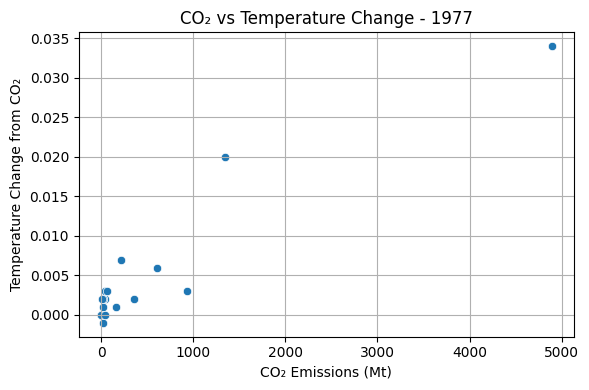

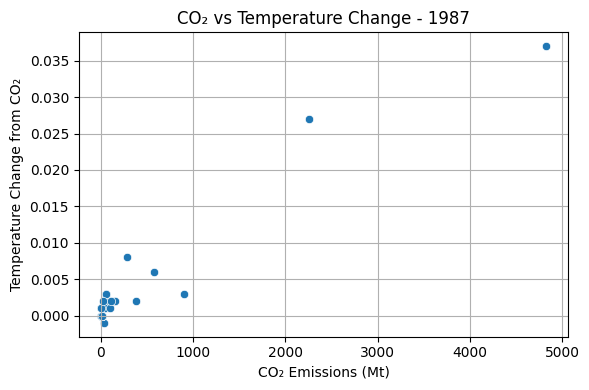

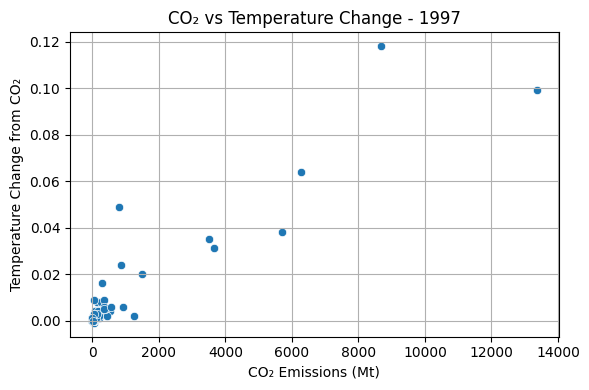

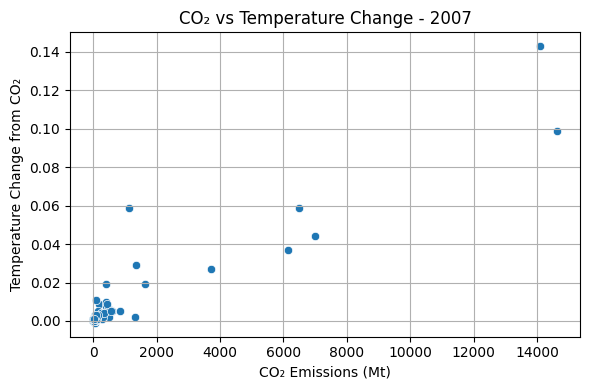

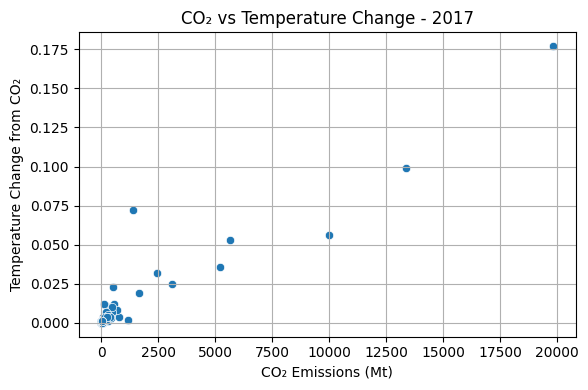

In [138]:
# 4. Temperature Change Relationship
#Relationship between CO2 and temperature change

years = sorted(df['Year'].unique())
selected_years = years[::10]  # Every 10th year

for year in selected_years:
    yearly_data = df[df['Year'] == year]
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=yearly_data, x='CO2', y='temperature_change_from_co2')
    plt.title(f'CO₂ vs Temperature Change - {year}')
    plt.xlabel('CO₂ Emissions (Mt)')
    plt.ylabel('Temperature Change from CO₂')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Conclusion: The strong positive correlation between CO2 and temperature change empirically validates the link between emissions and global warming.

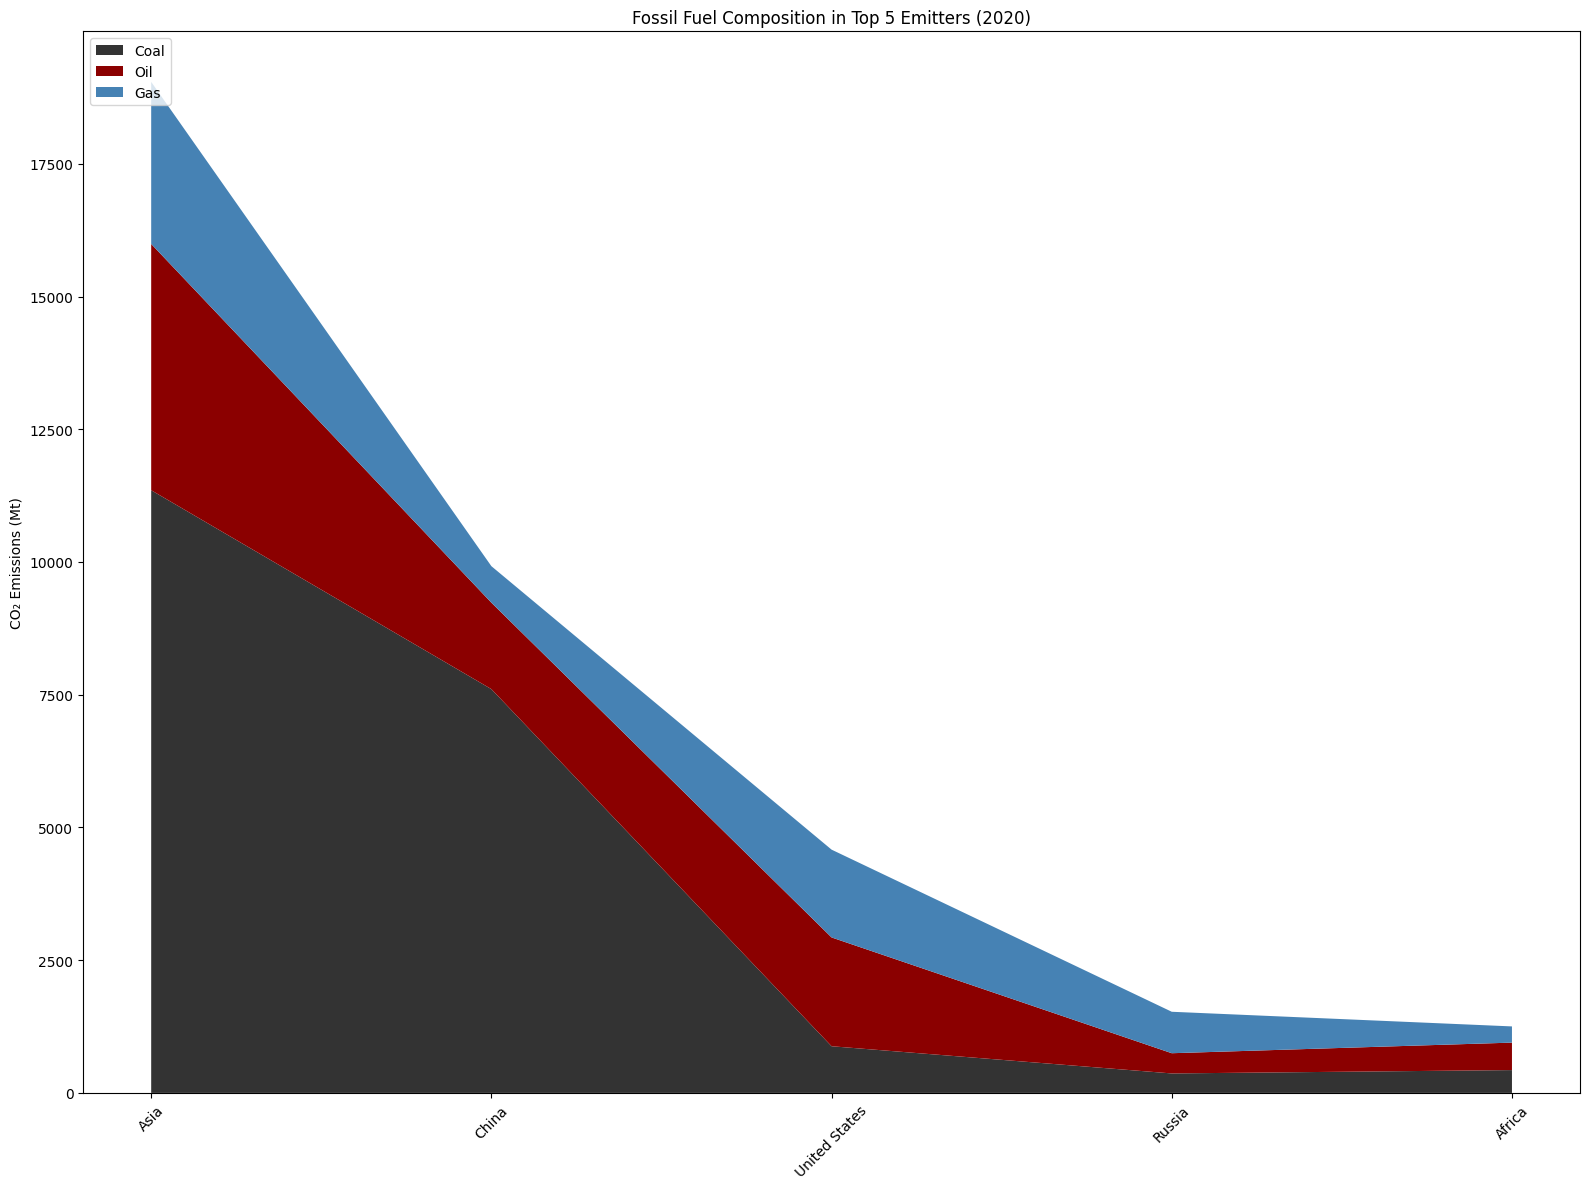

In [140]:
#5. Despite near-identical correlation scores of coal_co2 and oil_co2, how do their emission patterns differ in the 5 highest-emitting countries?

top_emitters = df[df['Year']==2020].nlargest(5, 'CO2')
# Stacked area plot for fuel composition
plt.figure(figsize=(16, 12))
plt.stackplot(
    top_emitters['Country'], 
    top_emitters['coal_co2'], 
    top_emitters['oil_co2'], 
    top_emitters['gas_co2'],
    labels=['Coal','Oil','Gas'],
    colors=['#333333','#8B0000','#4682B4']
)
plt.title('Fossil Fuel Composition in Top 5 Emitters (2020)')
plt.ylabel('CO₂ Emissions (Mt)')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Conclusion - Oil's slightly higher correlation may mask critical regional differences (e.g., coal-heavy China vs. oil-dependent Saudi Arabia).
# This reveals where decarbonization efforts should prioritize fuel switching.

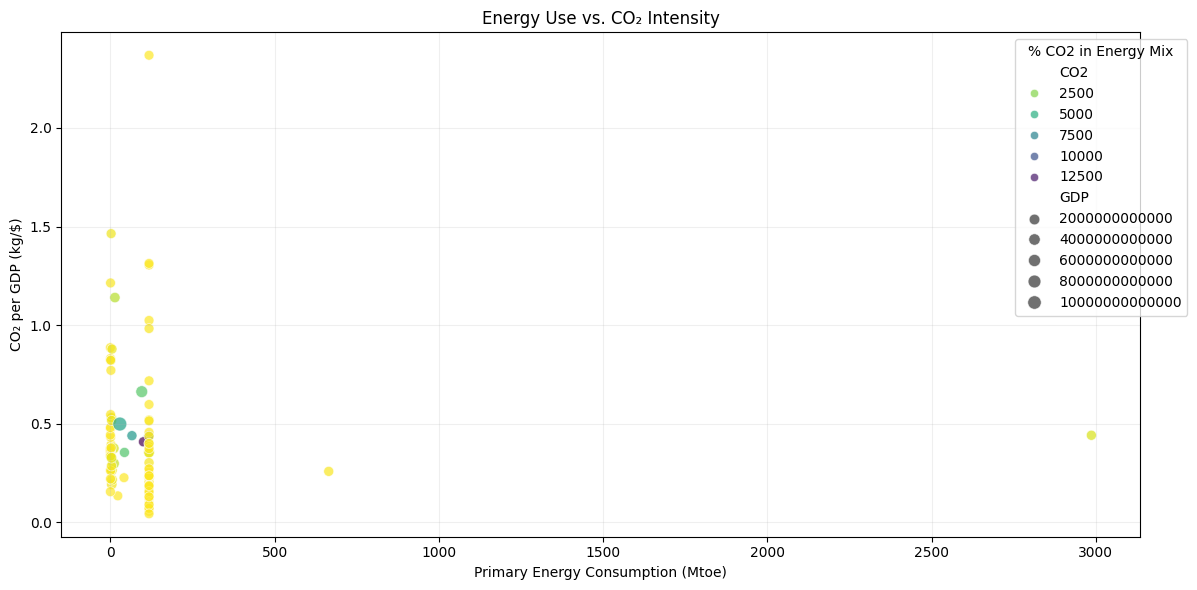

In [141]:
# 6. The Energy Efficiency Paradox

# Why does primary_energy_consumption (0.025977 correlation) show almost no link to CO₂, despite energy being the main emission source?
# Calculate coal's share of total CO₂ emissions
coal_energy = df['coal_co2'] * 0.4
df['coal_share'] = (coal_energy / df['primary_energy_consumption']) * 100
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df[df['Year'] == 1997],
    x='primary_energy_consumption',
    y='co2_per_gdp',
    hue='CO2',
    size='GDP',
    palette='viridis_r',
    sizes=(50, 100),
    alpha=0.7
)
plt.title("Energy Use vs. CO₂ Intensity")
plt.xlabel("Primary Energy Consumption (Mtoe)")
plt.ylabel("CO₂ per GDP (kg/$)")
plt.legend(title='% CO2 in Energy Mix', bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

# Conclusion - Primary energy consumption alone doesn’t predict CO₂ emissions well because it ignores the energy source.

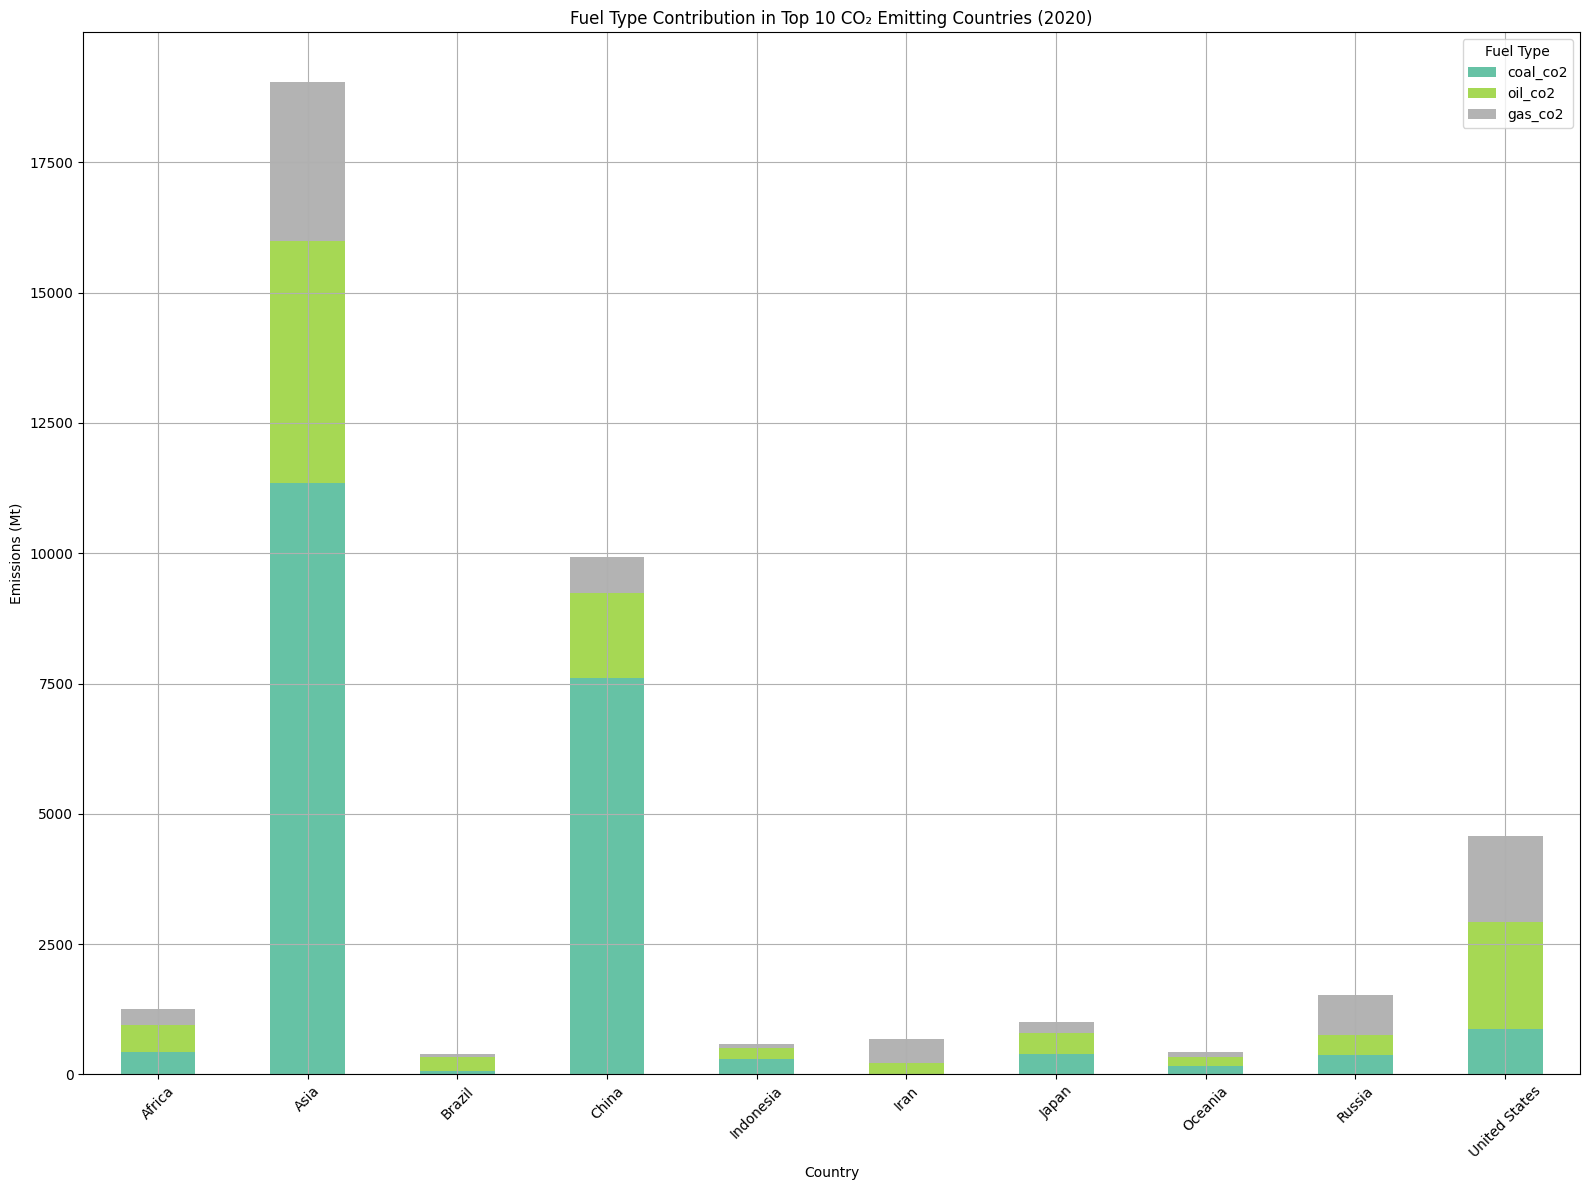

In [142]:
# 7. To identify which fuel types are most distinctive/significant for top 10 country's emissions profile, to conclude emmision rates.

fuels = ['coal_co2', 'oil_co2', 'gas_co2']
top_emitters = df[df['Year'] == 2020].groupby('Country')['CO2'].sum().nlargest(10).index
top_data = df[df['Country'].isin(top_emitters) & (df['Year'] == 2020)]
fuel_summary = top_data.groupby('Country')[fuels].sum()
fuel_summary.plot(kind='bar', stacked=True, figsize=(16, 12), colormap='Set2')
plt.title("Fuel Type Contribution in Top 10 CO₂ Emitting Countries (2020)")
plt.ylabel("Emissions (Mt)")
plt.xlabel("Country")
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Conclusion - The fuel type used in each country strongly determines the CO₂ emission rate. Even if two countries use the same amount of energy